<a href="https://colab.research.google.com/github/jsansao/teic-20231/blob/main/TEIC_Tarefa2_MLP_Solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 2 - Perceptron Multi-camada [Solução]

Nesta tarefa, você vai propor topologias de redes neurais multi-camada que vão resolver problemas de classificação binária com distribuições não separáveis linearmente (semi-luas e círculos). 

As distribuições estão plotadas para visualização (vermelho e azul representam as diferentes classes). 

O objetivo é obter uma rede que tenha 100% de acurácia de treinamento e validação em até 1000 épocas de treinamento. 

Sugestão: Aumente progressivamente o número de camadas (inicie com 2 camadas) e avalie a melhoria das acurácias. 


## Geração dos datasets

In [1]:


import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras


np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1000
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)


## 1. Meia-lua

In [2]:
data = noisy_moons[0]
label = noisy_moons[1]

X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=0)

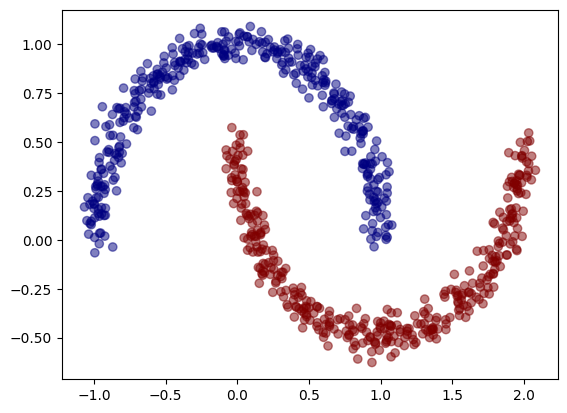

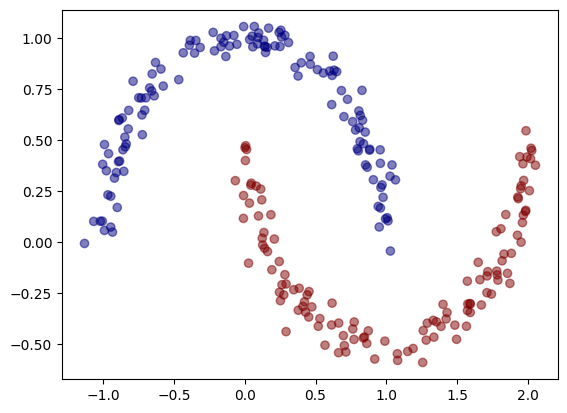

In [3]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train , alpha=0.5, cmap='jet')
plt.show()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test , alpha=0.5, cmap='jet')
plt.show()

In [6]:
model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[2]),
                              tf.keras.layers.Dense(1, activation=tf.nn.relu)])

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

model.summary()

Epoch 1/200
24/24 [==============================] - 1s 9ms/step - loss: 0.2500 - accuracy: 0.6653 - val_loss: 0.1703 - val_accuracy: 0.7840
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1623 - accuracy: 0.7613 - val_loss: 0.1394 - val_accuracy: 0.7840
Epoch 3/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.7853 - val_loss: 0.1231 - val_accuracy: 0.8160
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.1262 - accuracy: 0.8000 - val_loss: 0.1118 - val_accuracy: 0.8360
Epoch 5/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1164 - accuracy: 0.8107 - val_loss: 0.1034 - val_accuracy: 0.8480
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1089 - accuracy: 0.8227 - val_loss: 0.0967 - val_accuracy: 0.8560
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1027 - accuracy: 0.8373 - val_loss: 0.0914 - val_accuracy: 0.8560
Epoch 8/200
2

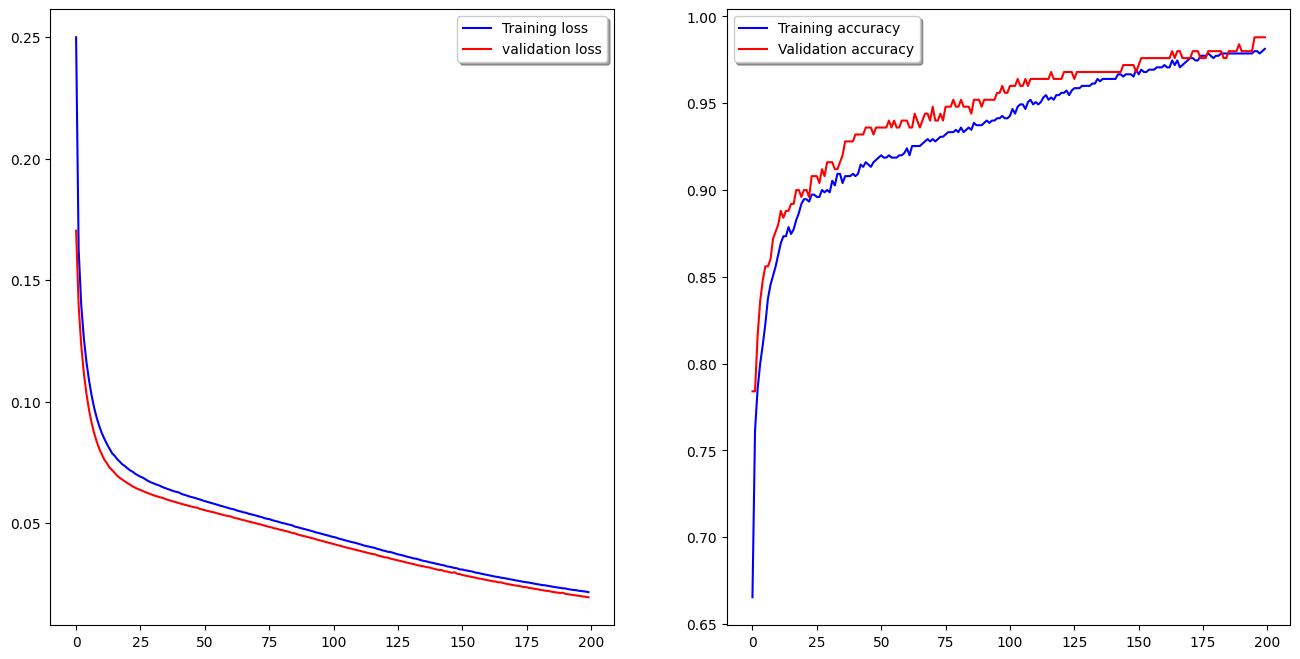

In [7]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


8/8 [==============================] - 0s 1ms/step


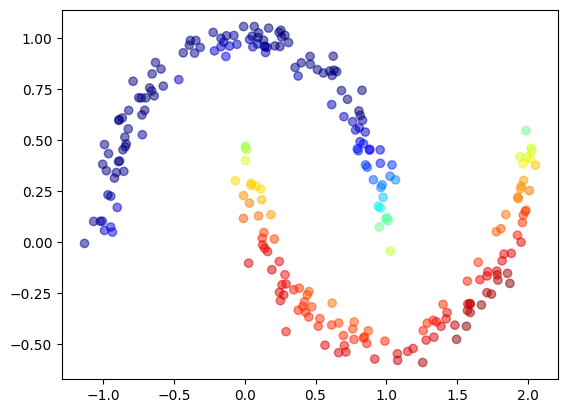

In [8]:
Y_predict = model.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=Y_predict , alpha=0.5, cmap='jet')
plt.show()

## 2. Círculos

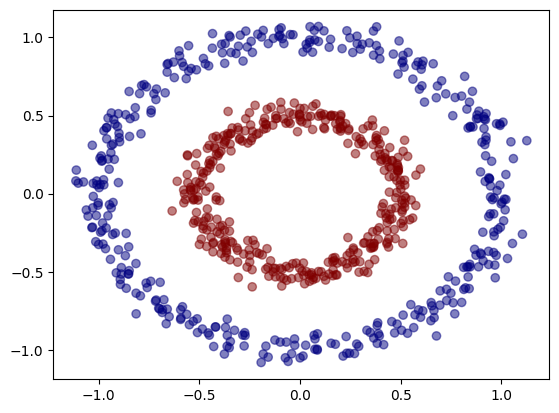

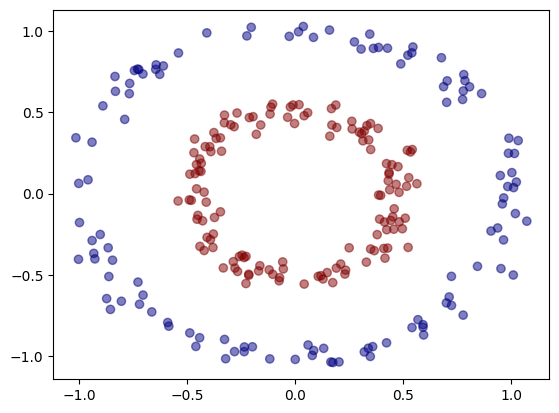

In [9]:
data = noisy_circles[0]
label = noisy_circles[1]

X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=0)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train , alpha=0.5, cmap='jet')
plt.show()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test , alpha=0.5, cmap='jet')
plt.show()

In [10]:
model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[2]),
                              tf.keras.layers.Dense(1, activation=tf.nn.relu)])


model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

model.summary()

Epoch 1/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4581 - accuracy: 0.5107 - val_loss: 0.4648 - val_accuracy: 0.4680
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.5013 - val_loss: 0.3331 - val_accuracy: 0.3920
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2829 - accuracy: 0.4360 - val_loss: 0.2789 - val_accuracy: 0.4400
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.5013 - val_loss: 0.2548 - val_accuracy: 0.4600
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2382 - accuracy: 0.5253 - val_loss: 0.2410 - val_accuracy: 0.4840
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2280 - accuracy: 0.5560 - val_loss: 0.2301 - val_accuracy: 0.5200
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2194 - accuracy: 0.5987 - val_loss: 0.2213 - val_accuracy: 0.6000
Epoch 8/100
2

8/8 [==============================] - 0s 1ms/step


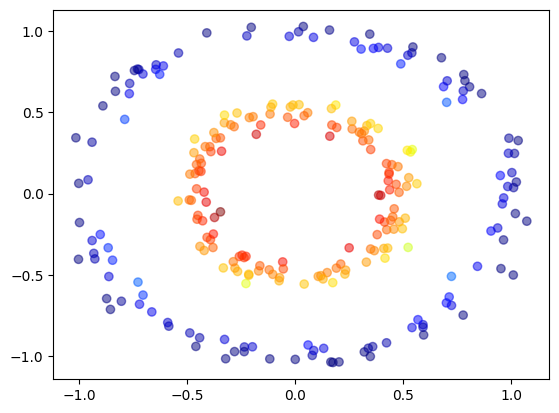

In [11]:
Y_predict = model.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=Y_predict , alpha=0.5, cmap='jet')
plt.show()

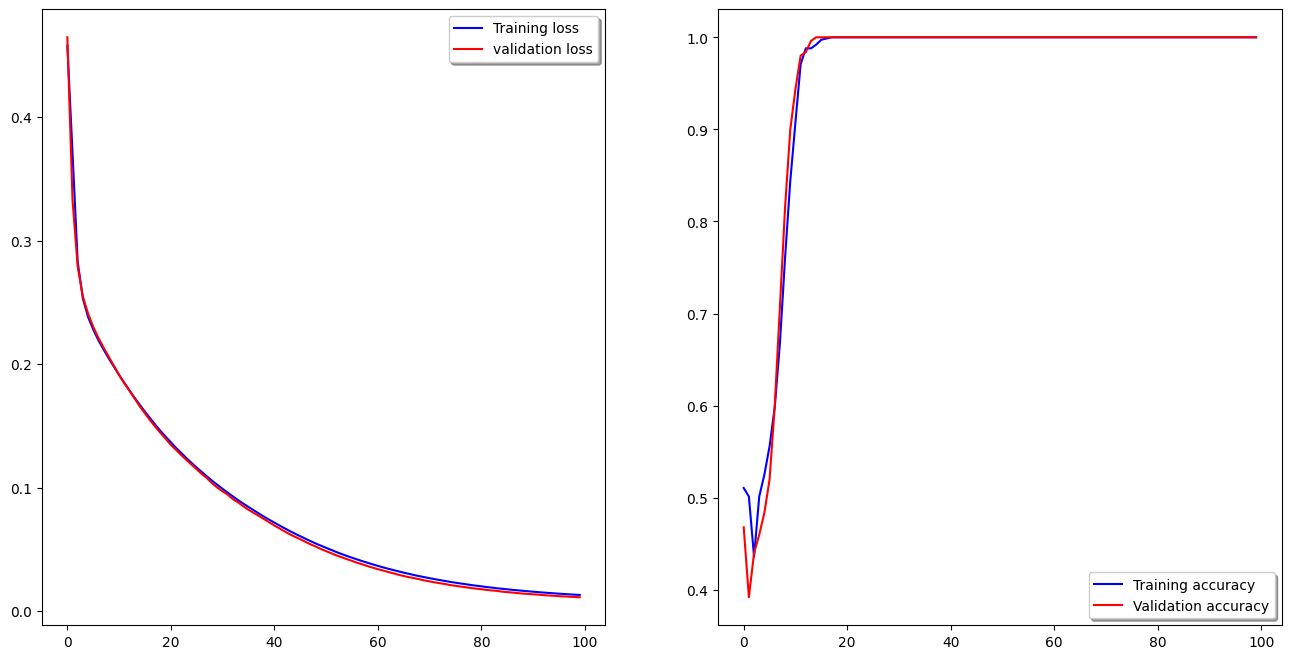

In [12]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)